In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Confidence intervals case study using NHANES data

In [2]:
pd.set_option('display.max_column',50)
df= pd.read_csv(r'C:\Users\hp\Desktop\NHANES DATA STATS WITH PYTHON.csv')
df.head()


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


For our population proportions, we will analyze the difference of proportion between female and male smokers. The column that specifies smoker and non-smoker is "SMQ020" in our dataset.

For our population means, we will analyze the difference of mean of body mass index within our female and male populations. The column that includes the body mass index value is "BMXBMI"

In [3]:
df['SMQ020'].value_counts()

2    3406
1    2319
9       8
7       2
Name: SMQ020, dtype: int64

In [4]:
df['SMQ020x']= df['SMQ020'].replace({1: 'yes', 2: 'no', 9: np.nan ,7: np.nan})

In [5]:
df['RIAGENDR'].value_counts()

2    2976
1    2759
Name: RIAGENDR, dtype: int64

In [6]:
df['RIAGENDR']= df['RIAGENDR'].replace({1: 'male', 2: 'female'})

In [7]:
df[['RIAGENDR','SMQ020x']]

,RIAGENDR,SMQ020x
0,male,yes
1,male,yes
2,male,yes
3,female,no
4,female,no
...,...,...
5730,female,yes
5731,male,no
5732,female,yes
5733,male,yes


In [8]:
df_smoker_gen= df[['RIAGENDR','SMQ020x']]

In [9]:
#for calculation it is always recommended to turn data into dummy variables
df_smoker_gen['SMQ020x']= df_smoker_gen['SMQ020x'].replace({'yes': 1,'no': 0})

<ipython-input-9-10d94271a17d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smoker_gen['SMQ020x']= df_smoker_gen['SMQ020x'].replace({'yes': 1,'no': 0})


In [10]:
df_smoker_gen

,RIAGENDR,SMQ020x
0,male,1.0
1,male,1.0
2,male,1.0
3,female,0.0
4,female,0.0
...,...,...
5730,female,1.0
5731,male,0.0
5732,female,1.0
5733,male,1.0


In [11]:
 dx=df_smoker_gen.groupby('RIAGENDR').agg({'SMQ020x': [np.mean,np.size]})

In [12]:
dx

SMQ020x        
              mean    size
RIAGENDR                  
female    0.304845  2976.0
male      0.513258  2759.0

# interval calculation 

In [13]:
female_prop= 0.304
female_n= 2976
female_se= np.sqrt((female_prop*(1-female_prop))/female_n)

In [14]:
male_prop= 0.513
male_n= 2759
male_se= np.sqrt((male_prop*(1-male_prop))/male_n)

In [15]:
diff= female_prop-male_prop
diff_se= np.sqrt(female_se**2+male_se**2)

In [16]:
t_star= 1.96

In [17]:
lwb= diff - t_star*diff_se
upb= diff + t_star*diff_se
(lwb,upb)

(-0.23391961457810448, -0.18408038542189556)

In [18]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,SMQ020x
0,83732,1.0,NaN,1.0,1,male,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,yes
1,83733,1.0,NaN,6.0,1,male,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,yes
2,83734,1.0,NaN,NaN,1,male,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,yes
3,83735,2.0,1.0,1.0,2,female,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,no
4,83736,2.0,1.0,1.0,2,female,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,no


# confidence interval for sub population

Since smoking rates vary strongly with age, it might be more informative to stratify the data into homogeneous age bands and compare the proportions of female and male smokers within each age band.  We can also calculate the 95% confidence interval for this difference within each age band.  These data can be displayed as a plot, with the difference in proportions plotted as a curve.  The confidence intervals can then be used to construct a "confidence band" around the estimates.

In [19]:
da= df[['RIAGENDR','RIDAGEYR','SMQ020x']].dropna()

In [20]:
da.head()

,RIAGENDR,RIDAGEYR,SMQ020x
0,male,62,yes
1,male,53,yes
2,male,78,yes
3,female,56,no
4,female,42,no


In [21]:
da['RIDAGEYR'].describe()

count    5725.00000
mean       48.02917
std        18.41959
min        18.00000
25%        32.00000
50%        48.00000
75%        63.00000
max        80.00000
Name: RIDAGEYR, dtype: float64

In [22]:
da['age_grp']= pd.cut(da['RIDAGEYR'],[18,30,40,50,60,70,80])

In [23]:
da.head()

,RIAGENDR,RIDAGEYR,SMQ020x,age_grp
0,male,62,yes,"(60, 70]"
1,male,53,yes,"(50, 60]"
2,male,78,yes,"(70, 80]"
3,female,56,no,"(50, 60]"
4,female,42,no,"(40, 50]"


In [24]:
grp_age_gen= da.groupby(['age_grp','RIAGENDR'])

In [25]:
table1= grp_age_gen.agg({'SMQ020x': lambda x: np.mean(x=='yes')}).unstack()
table1

SMQ020x          
RIAGENDR    female      male
age_grp                     
(18, 30]  0.226974  0.349265
(30, 40]  0.287526  0.503282
(40, 50]  0.268924  0.448878
(50, 60]  0.422175  0.572687
(60, 70]  0.374150  0.655963
(70, 80]  0.325183  0.655779

In [26]:
table2=grp_age_gen.agg({'SMQ020x': np.size}).unstack()
table2

SMQ020x     
RIAGENDR  female male
age_grp              
(18, 30]     608  544
(30, 40]     473  457
(40, 50]     502  401
(50, 60]     469  454
(60, 70]     441  436
(70, 80]     409  398

In [27]:
se= np.sqrt(table1*(1-table1)/table2)
se.columns=['female','male']
se

,female,male
age_grp,,
"(18, 30]",0.016988,0.020440
"(30, 40]",0.020811,0.023389
"(40, 50]",0.019790,0.024838
"(50, 60]",0.022806,0.023217
"(60, 70]",0.023043,0.022751
"(70, 80]",0.023163,0.023815


In [28]:
se_diff= np.sqrt(se.female**2 + se.male**2)
se_diff

age_grp
(18, 30]    0.026578
(30, 40]    0.031307
(40, 50]    0.031758
(50, 60]    0.032545
(60, 70]    0.032382
(70, 80]    0.033222
dtype: float64

In [29]:
table2.columns=["female",'male']
table2.sum()

female    2902
male      2690
dtype: int64

In [30]:
table1.columns=['female','male']
diff_prop= table1.female - table1.male

In [31]:
diff_prop

age_grp
(18, 30]   -0.122291
(30, 40]   -0.215756
(40, 50]   -0.179954
(50, 60]   -0.150512
(60, 70]   -0.281814
(70, 80]   -0.330596
dtype: float64

In [32]:
con_int_lwb= diff_prop - 2*se_diff
con_int_upb=diff_prop + 2*se_diff
(con_int_lwb,con_int_upb)


(age_grp
 (18, 30]   -0.175446
 (30, 40]   -0.278370
 (40, 50]   -0.243469
 (50, 60]   -0.215602
 (60, 70]   -0.346577
 (70, 80]   -0.397039
 dtype: float64,
 age_grp
 (18, 30]   -0.069136
 (30, 40]   -0.153142
 (40, 50]   -0.116438
 (50, 60]   -0.085423
 (60, 70]   -0.217050
 (70, 80]   -0.264152
 dtype: float64)

In [33]:
age_grp=pd.DataFrame([con_int_lwb,con_int_upb]).T
age_grp.columns=['lower_value','upper_value']
age_grp

,lower_value,upper_value
age_grp,,
"(18, 30]",-0.175446,-0.069136
"(30, 40]",-0.278370,-0.153142
"(40, 50]",-0.243469,-0.116438
"(50, 60]",-0.215602,-0.085423
"(60, 70]",-0.346577,-0.217050
"(70, 80]",-0.397039,-0.264152


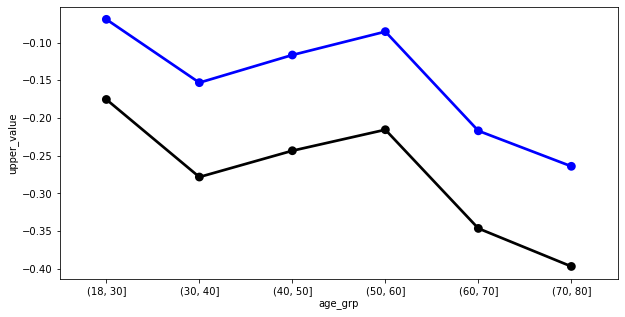

In [34]:
plt.figure(figsize=(10,5))
g=sns.pointplot(age_grp.index,age_grp['lower_value'],color='black',)
f=sns.pointplot(age_grp.index,age_grp['upper_value'],color='blue',alpha=0.5)


In [35]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,SMQ020x
0,83732,1.0,NaN,1.0,1,male,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,yes
1,83733,1.0,NaN,6.0,1,male,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,yes
2,83734,1.0,NaN,NaN,1,male,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,yes
3,83735,2.0,1.0,1.0,2,female,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,no
4,83736,2.0,1.0,1.0,2,female,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,no


# confidence interval for mean

In [36]:
df['BMXBMI'].head()

0    27.8
1    30.8
2    28.8
3    42.4
4    20.3
Name: BMXBMI, dtype: float64

In [41]:
da= df[['RIAGENDR','BMXBMI','RIDAGEYR']]
da.dropna()

,RIAGENDR,BMXBMI,RIDAGEYR
0,male,27.8,62
1,male,30.8,53
2,male,28.8,78
3,female,42.4,56
4,female,20.3,42
...,...,...,...
5730,female,21.5,76
5731,male,33.8,26
5732,female,31.0,80
5733,male,26.0,35


In [42]:
da['agegrp']= pd.cut(df['RIDAGEYR'],[18,30,40,50,60,70,80])

<ipython-input-42-194958fbb0ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da['agegrp']= pd.cut(df['RIDAGEYR'],[18,30,40,50,60,70,80])


In [43]:
dz=da.groupby('RIAGENDR').agg({'BMXBMI':[np.mean,np.size,np.std]})
dz.columns= ['mean','n','standard_deviation']
dz = dz.T
dz

RIAGENDR,female,male
mean,29.939946,28.778072
n,2976.000000,2759.000000
standard_deviation,7.753319,6.252568


In [44]:
diff_mean= dz.loc['mean','female']-dz.loc['mean','male']
diff_mean

1.1618735403270115

In [45]:
se_male= 6.252568/np.sqrt(2759.000000)
se_female=7.753319/np.sqrt(2976.000000)

In [46]:
se_diff= np.sqrt(se_female**2+se_male**2)
se_diff

0.18538993598139303

In [47]:
upb= diff_mean+ 1.96*se_diff
lwb= diff_mean - 1.96*se_diff
(lwb,upb)

(0.7985092658034811, 1.5252378148505419)

# confidence interval for sub population

In [48]:
da

,RIAGENDR,BMXBMI,RIDAGEYR,agegrp
0,male,27.8,62,"(60, 70]"
1,male,30.8,53,"(50, 60]"
2,male,28.8,78,"(70, 80]"
3,female,42.4,56,"(50, 60]"
4,female,20.3,42,"(40, 50]"
...,...,...,...,...
5730,female,21.5,76,"(70, 80]"
5731,male,33.8,26,"(18, 30]"
5732,female,31.0,80,"(70, 80]"
5733,male,26.0,35,"(30, 40]"


In [49]:
table= da.groupby(['agegrp','RIAGENDR'])

In [50]:
stats_table=table.agg({'BMXBMI': [np.mean,np.std,np.size]}).unstack()

stats_table.columns=['mean_female','mean_male','std_female','std_male','n_female','n_male']

stats_table

,mean_female,mean_male,std_female,std_male,n_female,n_male
agegrp,,,,,,
"(18, 30]",28.123881,27.391822,7.745893,6.649440,609.0,544.0
"(30, 40]",30.325586,29.611726,8.315608,6.622412,474.0,458.0
"(40, 50]",31.160643,29.724623,8.076195,6.407076,502.0,401.0
"(50, 60]",30.743777,29.231486,7.575848,5.914373,470.0,454.0
"(60, 70]",31.074828,29.392488,7.604514,5.933307,441.0,437.0
"(70, 80]",29.138213,27.957692,6.284968,4.974855,410.0,402.0


In [51]:
diff= stats_table['mean_female'] - stats_table['mean_male']
diff

agegrp
(18, 30]    0.732059
(30, 40]    0.713861
(40, 50]    1.436019
(50, 60]    1.512291
(60, 70]    1.682340
(70, 80]    1.180521
dtype: float64

In [52]:
se_male= stats_table['std_male']/np.sqrt(stats_table['n_male'])
se_female= stats_table['std_female']/np.sqrt(stats_table['n_female'])

In [53]:
se_diff= np.sqrt(se_female**2+se_male**2)
se_diff

agegrp
(18, 30]    0.424026
(30, 40]    0.491570
(40, 50]    0.481976
(50, 60]    0.446275
(60, 70]    0.460097
(70, 80]    0.397377
dtype: float64

In [54]:
upb= diff + 1.96*(se_diff)
lwb=diff - 1.96*(se_diff)


In [55]:
ci=pd.concat([lwb,upb],axis=1)
ci.columns=['lwb','upb']
ci

,lwb,upb
agegrp,,
"(18, 30]",-0.099032,1.563150
"(30, 40]",-0.249616,1.677338
"(40, 50]",0.491347,2.380692
"(50, 60]",0.637591,2.386991
"(60, 70]",0.780550,2.584130
"(70, 80]",0.401662,1.959380


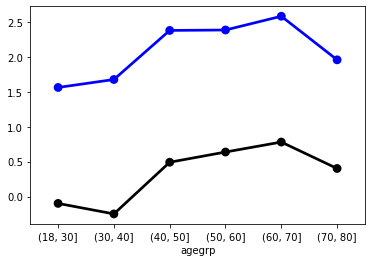

In [56]:
sns.pointplot(ci.index,lwb,color='black')
sns.pointplot(ci.index,upb,color='blue')